## Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

## Data Preparation and preprocessing

In [195]:
termdep=pd.read_csv("c:/users/mahesh/datasetcsv/bankfulls.csv")

C:\Users\mahesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [196]:
termdep

,Age,Job,marital,Education,Credit_default,bal_euro,housingloan,Perloan,Contact,cday,cmonth,cdurationsec,campaign,pdays,prev_outcome,campaignoutcome,subscription
0,32,services,single,secondary,no,121,yes,no,unknown,5,may,213,2,-1,0,unknown,no
1,41,blue-collar,single,secondary,no,842,yes,no,unknown,5,may,144,3,-1,0,unknown,no
2,43,management,divorced,secondary,no,693,yes,no,unknown,5,may,124,3,-1,0,unknown,no
3,40,blue-collar,divorced,secondary,no,-333,yes,no,unknown,5,may,183,2,-1,0,unknown,no
4,50,blue-collar,married,primary,no,1533,yes,no,unknown,5,may,325,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44867,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
44868,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
44869,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
44870,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [197]:
termdep.shape

(44872, 17)

In [198]:
termdep.isnull().sum()

Age                0
Job                0
marital            0
Education          0
Credit_default     0
bal_euro           0
housingloan        0
Perloan            0
Contact            0
cday               0
cmonth             0
cdurationsec       0
campaign           0
pdays              0
prev_outcome       0
campaignoutcome    0
subscription       0
dtype: int64

In [199]:
termdep.dropna()

,Age,Job,marital,Education,Credit_default,bal_euro,housingloan,Perloan,Contact,cday,cmonth,cdurationsec,campaign,pdays,prev_outcome,campaignoutcome,subscription
0,32,services,single,secondary,no,121,yes,no,unknown,5,may,213,2,-1,0,unknown,no
1,41,blue-collar,single,secondary,no,842,yes,no,unknown,5,may,144,3,-1,0,unknown,no
2,43,management,divorced,secondary,no,693,yes,no,unknown,5,may,124,3,-1,0,unknown,no
3,40,blue-collar,divorced,secondary,no,-333,yes,no,unknown,5,may,183,2,-1,0,unknown,no
4,50,blue-collar,married,primary,no,1533,yes,no,unknown,5,may,325,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44867,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
44868,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
44869,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
44870,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [200]:
termdep.dtypes

Age                object
Job                object
marital            object
Education          object
Credit_default     object
bal_euro            int64
housingloan        object
Perloan            object
Contact            object
cday                int64
cmonth             object
cdurationsec        int64
campaign            int64
pdays               int64
prev_outcome        int64
campaignoutcome    object
subscription       object
dtype: object

In [201]:
termdep['Age']=pd.to_numeric(termdep['Age'],errors='coerce')
termdep['Job']=termdep['Job'].astype('category')
termdep['marital']=termdep['marital'].astype('category')
termdep['Education']=termdep['Education'].astype('category')
termdep['Credit_default']=termdep['Credit_default'].astype('category')
termdep['housingloan']=termdep['housingloan'].astype('category')
termdep['Perloan']=termdep['Perloan'].astype('category')
termdep['Contact']=termdep['Contact'].astype('category')
termdep['cmonth']=termdep['cmonth'].astype('category')
termdep['campaignoutcome']=termdep['campaignoutcome'].astype('category')
termdep['subscription']=termdep['subscription'].astype('category')

In [202]:
termdep.dtypes

Age                 float64
Job                category
marital            category
Education          category
Credit_default     category
bal_euro              int64
housingloan        category
Perloan            category
Contact            category
cday                  int64
cmonth             category
cdurationsec          int64
campaign              int64
pdays                 int64
prev_outcome          int64
campaignoutcome    category
subscription       category
dtype: object

In [203]:
termdep=termdep.dropna()

## Data Visualisation

In [204]:
enumerate(termdep.columns)

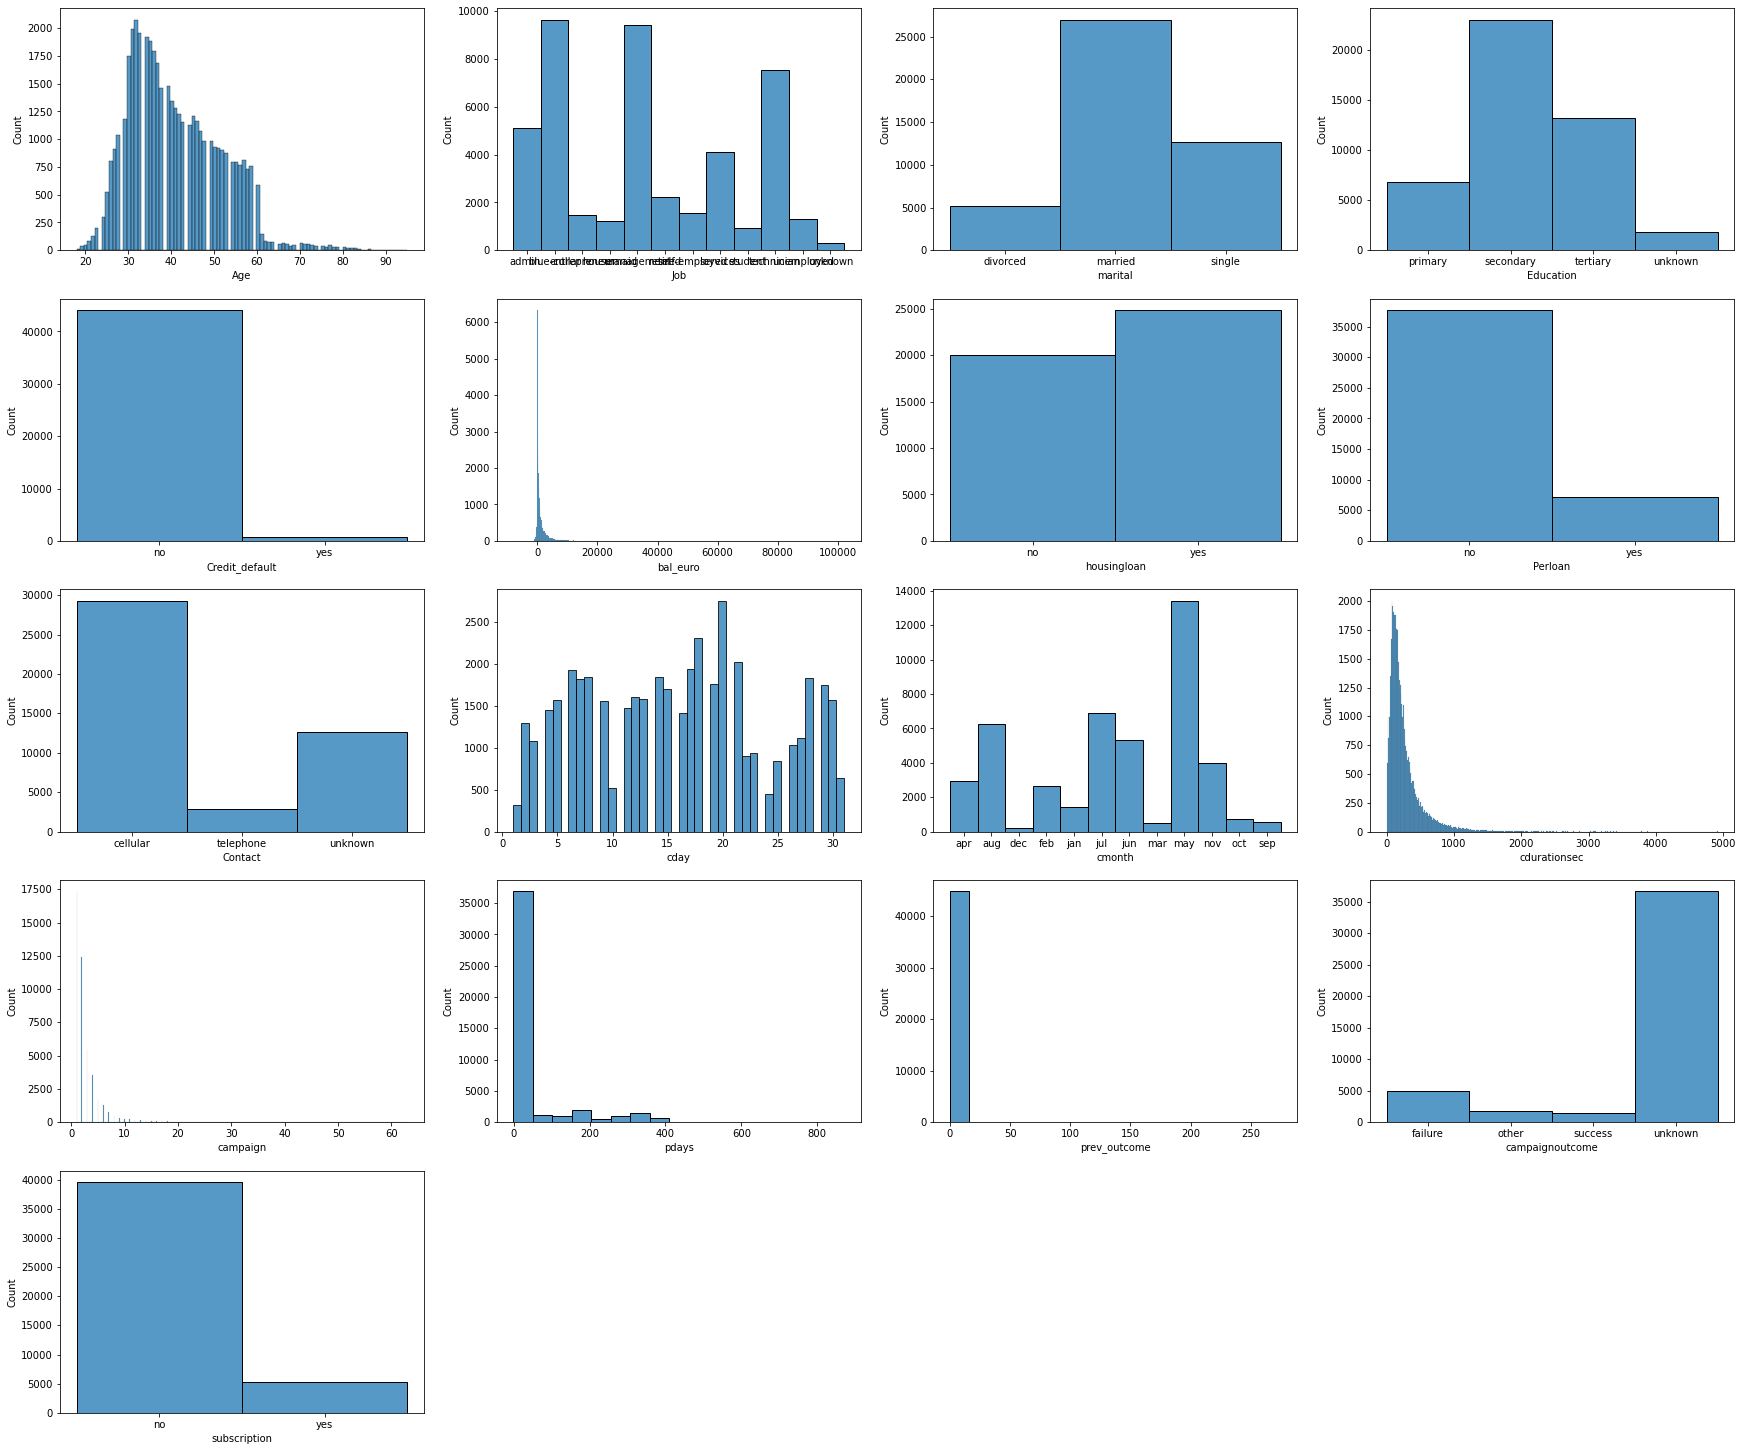

In [205]:
plt.figure(figsize=(30,90))
n=1
for i in enumerate(termdep.columns):
 plt.subplot(17,4,i[0]+1)
 sns.histplot(termdep[i[n]])
n=n+1

In [206]:
X = termdep.iloc[:,0:-1]

In [207]:
data_encoded=pd.get_dummies(X)

In [208]:
data_encoded

,Age,bal_euro,cday,cdurationsec,campaign,pdays,prev_outcome,Job_admin.,Job_blue-collar,Job_entrepreneur,...,cmonth_jun,cmonth_mar,cmonth_may,cmonth_nov,cmonth_oct,cmonth_sep,campaignoutcome_failure,campaignoutcome_other,campaignoutcome_success,campaignoutcome_unknown
0,32.0,121,5,213,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,41.0,842,5,144,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,43.0,693,5,124,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,40.0,-333,5,183,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,50.0,1533,5,325,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44867,51.0,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44868,71.0,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44869,72.0,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
44870,57.0,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [209]:
# Dividing our data into input and output variables 
Xtest=data_encoded
Ytest= termdep.iloc[:,16:]

In [210]:
Xtest

,Age,bal_euro,cday,cdurationsec,campaign,pdays,prev_outcome,Job_admin.,Job_blue-collar,Job_entrepreneur,...,cmonth_jun,cmonth_mar,cmonth_may,cmonth_nov,cmonth_oct,cmonth_sep,campaignoutcome_failure,campaignoutcome_other,campaignoutcome_success,campaignoutcome_unknown
0,32.0,121,5,213,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,41.0,842,5,144,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,43.0,693,5,124,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,40.0,-333,5,183,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,50.0,1533,5,325,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44867,51.0,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44868,71.0,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44869,72.0,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
44870,57.0,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [211]:
Xtest.corr()

,Age,bal_euro,cday,cdurationsec,campaign,pdays,prev_outcome,Job_admin.,Job_blue-collar,Job_entrepreneur,...,cmonth_jun,cmonth_mar,cmonth_may,cmonth_nov,cmonth_oct,cmonth_sep,campaignoutcome_failure,campaignoutcome_other,campaignoutcome_success,campaignoutcome_unknown
Age,1.000000,0.098814,-0.005603,-0.005117,0.005761,-0.022720,0.001990,-0.055790,-0.044514,0.021587,...,0.052993,0.019855,-0.133225,0.033763,0.060692,0.032851,-0.003982,-0.022484,0.036172,-0.002128
bal_euro,0.098814,1.000000,0.001854,0.021862,-0.015517,0.002597,0.016185,-0.026527,-0.048775,0.009908,...,0.028873,0.023021,-0.068721,0.116839,0.039997,0.021722,0.011163,0.008056,0.034917,-0.029370
cday,-0.005603,0.001854,1.000000,-0.029677,0.159652,-0.097780,-0.054551,-0.010187,-0.022231,-0.002202,...,-0.198781,-0.021906,-0.010355,0.093662,0.029437,-0.055368,-0.072628,-0.035209,-0.032361,0.091568
cdurationsec,-0.005117,0.021862,-0.029677,1.000000,-0.084574,-0.001304,0.001373,-0.016055,0.010055,-0.001303,...,-0.021287,-0.005474,0.006187,-0.005866,0.015224,0.015214,-0.018785,-0.001832,0.042692,-0.003816
campaign,0.005761,-0.015517,0.159652,-0.084574,1.000000,-0.090027,-0.033667,-0.021797,0.009202,0.002224,...,0.042825,-0.018947,-0.063506,-0.085755,-0.051474,-0.037102,-0.089320,-0.020762,-0.058115,0.109604
pdays,-0.022720,0.002597,-0.097780,-0.001304,-0.090027,1.000000,0.454435,0.027747,0.020449,-0.014228,...,-0.114749,0.031702,0.084530,0.006932,0.056452,0.084130,0.700738,0.389461,0.228135,-0.869783
prev_outcome,0.001990,0.016185,-0.054551,0.001373,-0.033667,0.454435,1.000000,0.014380,-0.016997,-0.008190,...,-0.061510,0.027083,0.004264,0.037299,0.053704,0.064791,0.350207,0.306345,0.201144,-0.532439
Job_admin.,-0.055790,-0.026527,-0.010187,-0.016055,-0.021797,0.027747,0.014380,1.000000,-0.187971,-0.066224,...,-0.004410,0.013310,0.026561,-0.007820,0.011378,0.007343,0.018616,0.010851,0.012161,-0.026206
Job_blue-collar,-0.044514,-0.048775,-0.022231,0.010055,0.009202,0.020449,-0.016997,-0.187971,1.000000,-0.096476,...,0.022086,-0.041547,0.166547,-0.048033,-0.042504,-0.044929,0.002509,0.001491,-0.053177,0.021978
Job_entrepreneur,0.021587,0.009908,-0.002202,-0.001303,0.002224,-0.014228,-0.008190,-0.066224,-0.096476,1.000000,...,0.015606,-0.016673,-0.010192,0.051275,-0.012048,-0.007789,0.001160,-0.013542,-0.019172,0.014925


In [212]:
Ytest

,subscription
0,no
1,no
2,no
3,no
4,no
...,...
44867,yes
44868,yes
44869,yes
44870,no


In [213]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

labelencoder = LabelEncoder()
Ytest.iloc[:, -1] = labelencoder.fit_transform(Ytest.iloc[:,-1])

In [214]:
Ytest

,subscription
0,0
1,0
2,0
3,0
4,0
...,...
44867,1
44868,1
44869,1
44870,0


# Logistic regression and fit the model

In [215]:

classifier = LogisticRegression()
classifier.fit(Xtest,Ytest)

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [216]:
#Predict for X dataset
y_pred = classifier.predict(Xtest)

In [217]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [218]:
y_pred_df= pd.DataFrame({'actual': Ytest['subscription'],
                         'predicted_prob': classifier.predict(Xtest)})

In [219]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
44867,1,1
44868,1,0
44869,1,1
44870,0,0


In [220]:
df['predicted']=y_pred

# Model Evaluation

In [221]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Ytest['subscription'],y_pred)
print (confusion_matrix)

[[38796   792]
 [ 4087  1196]]


In [222]:
## model efficiency/accuracy
((38796+1196)/(38796+792+4087+1196))*100

89.12660738561654

In [224]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_df['actual'],y_pred_df['predicted_prob']))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39588
           1       0.60      0.23      0.33      5283

    accuracy                           0.89     44871
   macro avg       0.75      0.60      0.63     44871
weighted avg       0.87      0.89      0.87     44871



# ROC Curve

In [225]:
Ytest

,subscription
0,0
1,0
2,0
3,0
4,0
...,...
44867,1
44868,1
44869,1
44870,0


In [226]:
Xtest

,Age,bal_euro,cday,cdurationsec,campaign,pdays,prev_outcome,Job_admin.,Job_blue-collar,Job_entrepreneur,...,cmonth_jun,cmonth_mar,cmonth_may,cmonth_nov,cmonth_oct,cmonth_sep,campaignoutcome_failure,campaignoutcome_other,campaignoutcome_success,campaignoutcome_unknown
0,32.0,121,5,213,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,41.0,842,5,144,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,43.0,693,5,124,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,40.0,-333,5,183,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,50.0,1533,5,325,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44867,51.0,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44868,71.0,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44869,72.0,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
44870,57.0,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


Text(0, 0.5, 'True Positive Rate')

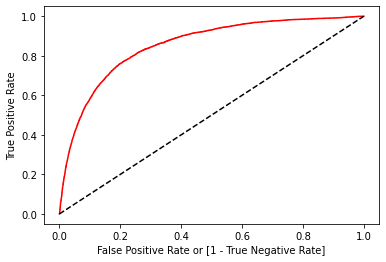

In [227]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Ytest, classifier.predict_proba (Xtest)[:,1])

auc = roc_auc_score(Ytest,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')



In [228]:
auc

0.6031902301829227